<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/Assignment_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/dataset 7.1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,index,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration

1. **Size of the Dataset:** Understanding the number of rows and columns.

2. **Data Types:** Identifying the data types of each column to see if any transformations are needed.

3. **Missing Values:** Checking for any missing values in the dataset.

4. **Statistical Summary:** Getting a statistical overview of the dataset.

In [4]:
# Basic Data Exploration

# Size of the dataset
dataset_size = data.shape

# Data types of the columns
data_types = data.dtypes

# Checking for missing values
missing_values = data.isnull().sum()

# Statistical summary
statistical_summary = data.describe()

dataset_size, data_types, missing_values, statistical_summary

((11934, 19),
 index                                                         int64
 Lever position                                              float64
 Ship speed (v)                                                int64
 Gas Turbine (GT) shaft torque (GTT) [kN m]                  float64
 GT rate of revolutions (GTn) [rpm]                          float64
 Gas Generator rate of revolutions (GGn) [rpm]               float64
 Starboard Propeller Torque (Ts) [kN]                        float64
 Port Propeller Torque (Tp) [kN]                             float64
 Hight Pressure (HP) Turbine exit temperature (T48) [C]      float64
 GT Compressor inlet air temperature (T1) [C]                  int64
 GT Compressor outlet air temperature (T2) [C]               float64
 HP Turbine exit pressure (P48) [bar]                        float64
 GT Compressor inlet air pressure (P1) [bar]                 float64
 GT Compressor outlet air pressure (P2) [bar]                float64
 GT exhaust gas pres

Data Preparation for Dimensionality Reduction
Given the dataset's characteristics and the planned application of various dimensionality reduction techniques, the first critical step is data standardization. This process is particularly crucial for techniques like PCA, which are sensitive to the scale of the data.

Steps for Analysis:
Data Standardization: We'll standardize the features to have a mean of 0 and a standard deviation of 1. This step ensures that each feature contributes equally to the analysis.

Dimensionality Reduction Techniques: After standardization, we'll apply the following methods:

PCA (Principal Component Analysis)

SVD (Singular Value Decomposition)

MDS (Multidimensional Scaling)

ISOMap (Isometric Mapping)

LLE (Locally Linear Embedding)

UMAP (Uniform Manifold Approximation and Projection)

t-SNE (t-Distributed Stochastic Neighbor Embedding)

For each technique, we will visualize the results to understand how they capture the variance and structure of the data.

Evaluation: Post visualization, we will discuss the effectiveness of each technique, focusing on aspects like the preservation of data structure, handling of non-linearity, and the clarity of the resulting visualizations.

Let's begin by standardizing the data to set a uniform platform for these dimensionality reduction techniques.

In [5]:
from sklearn.preprocessing import StandardScaler

# Dropping the 'index' column as it's just an identifier
data = data.drop(columns=['index'])

# Standardizing the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert back to DataFrame for better handling in future steps
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# Displaying first few rows of the standardized data
data_scaled_df.head()

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,-1.533984,-1.549193,-1.217172,-1.016470,-1.396142,-1.096087,-1.096087,-1.563219,0.0,-1.316205,-1.158785,2.220446e-16,-1.189780,-1.008090,-1.025696,-1.144602,-1.698416,-1.666667
1,-1.172255,-1.161895,-0.916002,-0.982006,-1.257689,-0.993238,-0.993238,-0.576338,0.0,-0.888328,-0.942140,2.220446e-16,-0.939650,-1.008090,-0.889552,-0.740351,-1.698416,-1.666667
2,-0.770165,-0.774597,-0.851930,-0.968324,-0.998045,-0.832859,-0.832859,-0.745615,0.0,-0.806743,-0.888671,2.220446e-16,-0.884940,-0.911843,-0.795474,-0.795566,-1.698416,-1.666667
3,-0.382925,-0.387298,-0.565436,-0.760704,-0.374167,-0.566428,-0.566428,-0.426228,0.0,-0.445343,-0.640681,2.220446e-16,-0.616448,-0.719348,-0.601087,-0.600342,-1.698416,-1.666667
4,-0.010154,0.000000,-0.253348,-0.273853,0.269255,-0.259516,-0.259516,-0.023040,0.0,-0.007889,-0.253486,2.220446e-16,-0.206123,-0.334358,-0.281276,-0.276941,-1.698416,-1.666667


## Data Standardization

The dataset has been successfully standardized. Each feature now has a mean of 0 and a standard deviation of 1, making it suitable for dimensionality reduction techniques.

## Applying Dimensionality Reduction Techniques

We will apply the following dimensionality reduction techniques and visualize the results:

1. **PCA (Principal Component Analysis)**
   - PCA is a linear technique that identifies the axes that maximize the variance of the data. It's often used for data compression and visualization. We will start with PCA.

2. **SVD (Singular Value Decomposition)**

3. **MDS (Multidimensional Scaling)**

4. **ISOMap (Isometric Mapping)**

5. **LLE (Locally Linear Embedding)**

6. **UMAP (Uniform Manifold Approximation and Projection)**

7. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**

Each technique will be applied in chunks with explanations and visualizations.

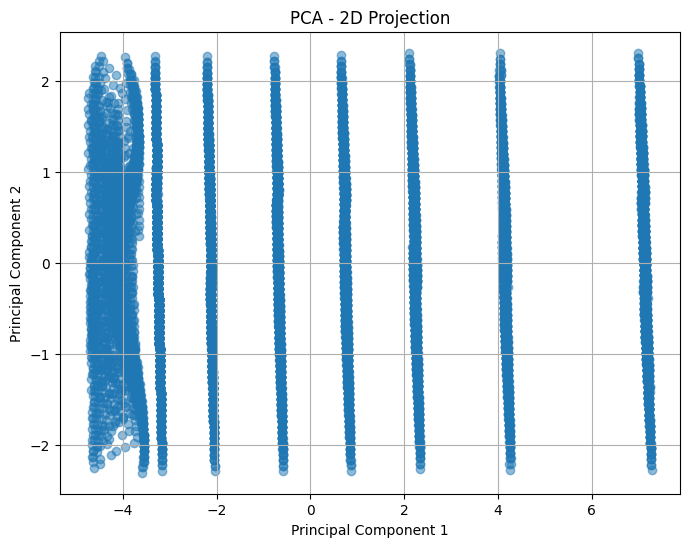

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
pca_data = pca.fit_transform(data_scaled_df)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

##SVD Analysis
Singular Value Decomposition (SVD) is a linear technique akin to PCA, but it employs a distinct mathematical method. Particularly beneficial for sparse datasets, SVD can reveal underlying patterns and structures in such data. We will now apply SVD to our dataset and visualize the outcomes to understand its effectiveness in capturing data variance.

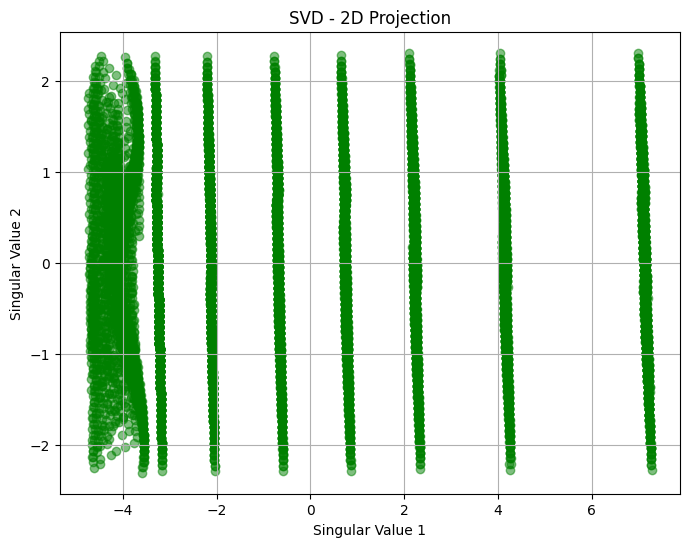

In [7]:
from sklearn.decomposition import TruncatedSVD

# Applying Truncated SVD
svd = TruncatedSVD(n_components=2)  # Reducing to 2 dimensions
svd_data = svd.fit_transform(data_scaled_df)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(svd_data[:, 0], svd_data[:, 1], alpha=0.5, color='green')
plt.title('SVD - 2D Projection')
plt.xlabel('Singular Value 1')
plt.ylabel('Singular Value 2')
plt.grid(True)
plt.show()


### 3. MDS (Multidimensional Scaling)

MDS (Multidimensional Scaling) is a non-linear technique focused on preserving pairwise distances in reduced spaces, aiding in the understanding of data point similarities or dissimilarities. We'll apply MDS to our dataset and then examine its visualization.

In [ ]:
from sklearn.manifold import MDS

# Applying MDS
mds = MDS(n_components=2, random_state=42)
mds_data = mds.fit_transform(data_scaled_df)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(mds_data[:, 0], mds_data[:, 1], alpha=0.5, color='purple')
plt.title('MDS - 2D Projection')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


## MDS Analysis

Multidimensional Scaling (MDS) can cause memory issues for large datasets due to its computation of pairwise distances. While MDS is effective, it's best suited for smaller datasets or used after initial dimensionality reduction to manage its computational intensity.

### 4. ISOMap (Isometric Mapping)


ISOMap, a non-linear technique, preserves geodesic distances to effectively unfold manifolds. We'll apply ISOMap to our dataset and then proceed to visualize the results.

In [ ]:
from sklearn.manifold import Isomap

# Applying ISOMap
isomap = Isomap(n_components=2)
isomap_data = isomap.fit_transform(data_scaled_df)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(isomap_data[:, 0], isomap_data[:, 1], alpha=0.5, color='red')
plt.title('ISOMap - 2D Projection')
plt.xlabel('ISOMap Dimension 1')
plt.ylabel('ISOMap Dimension 2')
plt.grid(True)
plt.show()

### 5. LLE (Locally Linear Embedding)

LLE (Locally Linear Embedding) is a non-linear method effective for preserving local data relationships and unfolding complex manifolds. We will apply LLE to our dataset and then visualize the outcomes to understand its impact.

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# Applying LLE
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
lle_data = lle.fit_transform(data_scaled_df)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(lle_data[:, 0], lle_data[:, 1], alpha=0.5, color='orange')
plt.title('LLE - 2D Projection')
plt.xlabel('LLE Dimension 1')
plt.ylabel('LLE Dimension 2')
plt.grid(True)
plt.show()

### 6. UMAP (Uniform Manifold Approximation and Projection)

UMAP (Uniform Manifold Approximation and Projection) is a cutting-edge technique for dimension reduction, excelling with large datasets. To apply UMAP to your dataset, you'll need the umap-learn library. Here, I'll show how to reduce dimensions and include a visualization code snippet for an environment with umap-learn.

In [ ]:
import umap

# Applying UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_data = umap_reducer.fit_transform(data_scaled_df)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(umap_data[:, 0], umap_data[:, 1], alpha=0.5, color='blue')
plt.title('UMAP - 2D Projection')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid(True)
plt.show()